# **Import Library**

In [ ]:
pip install --upgrade git+https://github.com/ariaghora/mpstemmer.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ariaghora/mpstemmer.git to /tmp/pip-req-build-kscq2u29
  Running command git clone -q https://github.com/ariaghora/mpstemmer.git /tmp/pip-req-build-kscq2u29
  Created wheel for mpstemmer: filename=mpstemmer-0.1.0-py3-none-any.whl size=99820 sha256=b614059db08cfab772ac60d89172840a327265c809ef47ac7224e1f92851d302
  Stored in directory: /tmp/pip-ephem-wheel-cache-p_5rktuv/wheels/5c/f4/b7/9a03c2b80553c1ef45ee7971522137e4cd51db0ac5752f8d8a
Successfully built mpstemmer


In [ ]:
!pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 4.9 MB/s 
     |████████████████████████████████| 2.2 MB 41.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import gensim

import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [ ]:
!gdown --id 1ZSvxGmMJfN0Yhnx5TW2vP2-t5Vt1oY7w

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZSvxGmMJfN0Yhnx5TW2vP2-t5Vt1oY7w
To: /content/Kel5_Unlabelled.xlsx
100% 617k/617k [00:00<00:00, 99.9MB/s]


In [ ]:
pd.set_option('display.max_rows', None)

df = pd.read_excel('/content/Kel5_Unlabelled.xlsx')
df = df[['Judul', 'Isi', 'Label_Hoax']]
df.head()

,Judul,Isi,Label_Hoax
0,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,1.0
1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,1.0
2,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,1.0
3,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",1.0
4,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,1.0


In [ ]:
## ==== PENTING ====
df = df[df['Label_Hoax'] != 999]
df = df.dropna()
# df = df.sample(n=5000)

df.head()

# **Text Preprocessing**

## Case Folding

In [ ]:
df['Judul_Casefold'] = df['Judul'].str.lower()
df.head()

,Judul,Isi,Label_Hoax,Judul_Casefold
0,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,1.0,pemakaian masker menyebabkan penyakit legionna...
1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,1.0,instruksi gubernur jateng tentang penilangan ...
2,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,1.0,foto jim rohn: jokowi adalah presiden terbaik ...
3,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",1.0,"ini bukan politik, tapi kenyataan pak jokowi b..."
4,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,1.0,foto kadrun kalo lihat foto ini panas dingin


## Text Cleaning

In [ ]:
# remove emoji
df['Judul_Relevant'] = df['Judul_Casefold'].astype(str).apply(lambda x: x.encode('latin-1', 'ignore').decode('latin-1'))

def remove_mention(text):
  return re.sub(r'@[A-Za-z0-9]+\s?', '', str(text))

df['Judul_Relevant'] = df['Judul_Relevant'].apply(remove_mention)

def remove_hashtag(text):
  return re.sub(r'#[A-Za-z0-9]+\s?', '', str(text))

df['Judul_Relevant'] = df['Judul_Relevant'].apply(remove_hashtag)

def remove_https(text):
  return re.sub(r'https:\/\/.*', '', str(text))

df['Judul_Relevant'] = df['Judul_Relevant'].apply(remove_https)

def remove_number(text):
  return re.sub(r'\d+', '', str(text))

df['Judul_Relevant'] = df['Judul_Relevant'].apply(remove_number)

def remove_punc(text):
  return text.translate(str.maketrans('','',string.punctuation+"“"+"🫶"))

df['Judul_Relevant'] = df['Judul_Relevant'].apply(remove_punc)

def remove_whitespace(text):
  return text.strip()

df['Judul_Relevant'] = df['Judul_Relevant'].apply(remove_whitespace)

def remove_whitespace_multi(text):
  return re.sub('\s+', ' ', text)

df['Judul_Relevant'] = df['Judul_Relevant'].apply(remove_whitespace_multi)

def remove_single_char(text):
  return re.sub(r'\b[a-zA-Z]\b', '', text)

df['Judul_Relevant'] = df['Judul_Relevant'].apply(remove_single_char)

df.head()

,Judul,Isi,Label_Hoax,Judul_Casefold,Judul_Relevant
0,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,1.0,pemakaian masker menyebabkan penyakit legionna...,pemakaian masker menyebabkan penyakit legionna...
1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,1.0,instruksi gubernur jateng tentang penilangan ...,instruksi gubernur jateng tentang penilangan b...
2,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,1.0,foto jim rohn: jokowi adalah presiden terbaik ...,foto jim rohn jokowi adalah presiden terbaik d...
3,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",1.0,"ini bukan politik, tapi kenyataan pak jokowi b...",ini bukan politik tapi kenyataan pak jokowi be...
4,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,1.0,foto kadrun kalo lihat foto ini panas dingin,foto kadrun kalo lihat foto ini panas dingin


## Tokenization

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['Judul_Tokenized'] = df['Judul_Relevant'].apply(word_tokenize_wrapper)

df.head()

,Judul,Isi,Label_Hoax,Judul_Casefold,Judul_Relevant,Judul_Tokenized
0,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,1.0,pemakaian masker menyebabkan penyakit legionna...,pemakaian masker menyebabkan penyakit legionna...,"[pemakaian, masker, menyebabkan, penyakit, leg..."
1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,1.0,instruksi gubernur jateng tentang penilangan ...,instruksi gubernur jateng tentang penilangan b...,"[instruksi, gubernur, jateng, tentang, penilan..."
2,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,1.0,foto jim rohn: jokowi adalah presiden terbaik ...,foto jim rohn jokowi adalah presiden terbaik d...,"[foto, jim, rohn, jokowi, adalah, presiden, te..."
3,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",1.0,"ini bukan politik, tapi kenyataan pak jokowi b...",ini bukan politik tapi kenyataan pak jokowi be...,"[ini, bukan, politik, tapi, kenyataan, pak, jo..."
4,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,1.0,foto kadrun kalo lihat foto ini panas dingin,foto kadrun kalo lihat foto ini panas dingin,"[foto, kadrun, kalo, lihat, foto, ini, panas, ..."


## Stemming

In [ ]:
from mpstemmer import MPStemmer

stemmer = MPStemmer()

def stemming(words):
  return [stemmer.stem(word) for word in words]

df['Judul_Stemmed'] = df['Judul_Tokenized'].apply(stemming)
df.head()

,Judul,Isi,Label_Hoax,Judul_Casefold,Judul_Relevant,Judul_Tokenized,Judul_Stemmed
0,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,1.0,pemakaian masker menyebabkan penyakit legionna...,pemakaian masker menyebabkan penyakit legionna...,"[pemakaian, masker, menyebabkan, penyakit, leg...","[pakai, masker, sebab, penyakit, legionnaires]"
1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,1.0,instruksi gubernur jateng tentang penilangan ...,instruksi gubernur jateng tentang penilangan b...,"[instruksi, gubernur, jateng, tentang, penilan...","[instruksi, gubernur, jateng, tentang, tilang,..."
2,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,1.0,foto jim rohn: jokowi adalah presiden terbaik ...,foto jim rohn jokowi adalah presiden terbaik d...,"[foto, jim, rohn, jokowi, adalah, presiden, te...","[foto, jim, rohn, jokowi, adalah, presiden, ba..."
3,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",1.0,"ini bukan politik, tapi kenyataan pak jokowi b...",ini bukan politik tapi kenyataan pak jokowi be...,"[ini, bukan, politik, tapi, kenyataan, pak, jo...","[ini, bukan, politik, tapi, nyata, pak, jokow,..."
4,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,1.0,foto kadrun kalo lihat foto ini panas dingin,foto kadrun kalo lihat foto ini panas dingin,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[foto, kadrun, kalau, lihat, foto, ini, panas,..."


## Stopwords Removal

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
list_stopwords = stopwords.words('indonesian')
list_stopwords = set(list_stopwords)
print(list_stopwords)

{'berturut-turut', 'berupa', 'dalam', 'kapanpun', 'lalu', 'sebuah', 'dimaksudkan', 'hampir', 'bekerja', 'mirip', 'disinilah', 'sebutnya', 'jadi', 'semampunya', 'yakni', 'melakukan', 'berapakah', 'berturut', 'sudahkah', 'sebutlah', 'sepantasnyalah', 'khususnya', 'pertama-tama', 'terhadapnya', 'beginian', 'bertutur', 'waktu', 'sekitar', 'sejak', 'telah', 'sesegera', 'diinginkan', 'menjadi', 'bawah', 'tegasnya', 'semata-mata', 'mula', 'tentu', 'diberikan', 'depan', 'ucap', 'mengucapkannya', 'pihaknya', 'diberikannya', 'perlunya', 'tadinya', 'sebelum', 'lain', 'sebenarnya', 'kemungkinannya', 'ternyata', 'memperbuat', 'makin', 'diperbuat', 'amatlah', 'terhadap', 'diketahui', 'bersiap-siap', 'dengan', 'kalau', 'kinilah', 'memang', 'semacam', 'tutur', 'sewaktu', 'kita', 'kami', 'seingat', 'seketika', 'diingatkan', 'katakanlah', 'sesekali', 'secara', 'cara', 'pukul', 'bagaimana', 'dijelaskannya', 'mendapat', 'mendapatkan', 'masihkah', 'manakala', 'andalah', 'sebetulnya', 'semasih', 'benarlah',

In [ ]:
def remove_stopwords(words):
  return [word for word in words if word not in list_stopwords]

df['Judul_Clean'] = df['Judul_Stemmed'].apply(remove_stopwords)

df.head()

,Judul,Isi,Label_Hoax,Judul_Casefold,Judul_Relevant,Judul_Tokenized,Judul_Stemmed,Judul_Clean
0,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,1.0,pemakaian masker menyebabkan penyakit legionna...,pemakaian masker menyebabkan penyakit legionna...,"[pemakaian, masker, menyebabkan, penyakit, leg...","[pakai, masker, sebab, penyakit, legionnaires]","[pakai, masker, penyakit, legionnaires]"
1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,1.0,instruksi gubernur jateng tentang penilangan ...,instruksi gubernur jateng tentang penilangan b...,"[instruksi, gubernur, jateng, tentang, penilan...","[instruksi, gubernur, jateng, tentang, tilang,...","[instruksi, gubernur, jateng, tilang, masker, ..."
2,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,1.0,foto jim rohn: jokowi adalah presiden terbaik ...,foto jim rohn jokowi adalah presiden terbaik d...,"[foto, jim, rohn, jokowi, adalah, presiden, te...","[foto, jim, rohn, jokowi, adalah, presiden, ba...","[foto, jim, rohn, jokowi, presiden, dlm, sejar..."
3,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",1.0,"ini bukan politik, tapi kenyataan pak jokowi b...",ini bukan politik tapi kenyataan pak jokowi be...,"[ini, bukan, politik, tapi, kenyataan, pak, jo...","[ini, bukan, politik, tapi, nyata, pak, jokow,...","[politik, nyata, jokow, hasil, pulang, triliun..."
4,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,1.0,foto kadrun kalo lihat foto ini panas dingin,foto kadrun kalo lihat foto ini panas dingin,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[foto, kadrun, kalau, lihat, foto, ini, panas,...","[foto, kadrun, lihat, foto, panas, dingin]"


In [ ]:
df['Judul_Clean_Unlisted'] = df['Judul_Clean'].agg(lambda x: ' '.join(map(str, x)))
df.head()

,Judul,Isi,Label_Hoax,Judul_Casefold,Judul_Relevant,Judul_Tokenized,Judul_Stemmed,Judul_Clean,Judul_Clean_Unlisted
0,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,1.0,pemakaian masker menyebabkan penyakit legionna...,pemakaian masker menyebabkan penyakit legionna...,"[pemakaian, masker, menyebabkan, penyakit, leg...","[pakai, masker, sebab, penyakit, legionnaires]","[pakai, masker, penyakit, legionnaires]",pakai masker penyakit legionnaires
1,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,1.0,instruksi gubernur jateng tentang penilangan ...,instruksi gubernur jateng tentang penilangan b...,"[instruksi, gubernur, jateng, tentang, penilan...","[instruksi, gubernur, jateng, tentang, tilang,...","[instruksi, gubernur, jateng, tilang, masker, ...",instruksi gubernur jateng tilang masker muka r...
2,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,1.0,foto jim rohn: jokowi adalah presiden terbaik ...,foto jim rohn jokowi adalah presiden terbaik d...,"[foto, jim, rohn, jokowi, adalah, presiden, te...","[foto, jim, rohn, jokowi, adalah, presiden, ba...","[foto, jim, rohn, jokowi, presiden, dlm, sejar...",foto jim rohn jokowi presiden dlm sejarah bang...
3,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",1.0,"ini bukan politik, tapi kenyataan pak jokowi b...",ini bukan politik tapi kenyataan pak jokowi be...,"[ini, bukan, politik, tapi, kenyataan, pak, jo...","[ini, bukan, politik, tapi, nyata, pak, jokow,...","[politik, nyata, jokow, hasil, pulang, triliun...",politik nyata jokow hasil pulang triliun uang ...
4,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,1.0,foto kadrun kalo lihat foto ini panas dingin,foto kadrun kalo lihat foto ini panas dingin,"[foto, kadrun, kalo, lihat, foto, ini, panas, ...","[foto, kadrun, kalau, lihat, foto, ini, panas,...","[foto, kadrun, lihat, foto, panas, dingin]",foto kadrun lihat foto panas dingin


# **Topic Modelling**

## Create Corpus DIctionary

In [ ]:
dictionary = gensim.corpora.Dictionary(df['Judul_Clean'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 legionnaires
1 masker
2 pakai
3 penyakit
4 apps
5 etilang
6 gubernur
7 instruksi
8 jateng
9 muka
10 pikobar


## TF-IDF Vectorization

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df['Judul_Clean']]

from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.6279935945003782),
 (1, 0.45264653150946177),
 (2, 0.37776896682270755),
 (3, 0.5079623711306306)]


## Coherence Values

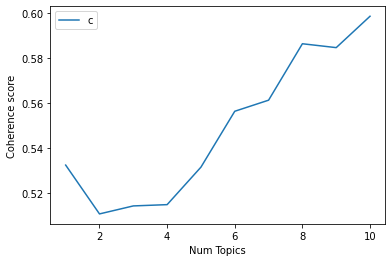

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=df['Judul_Clean'], start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.532452
Num Topics = 2  has Coherence Value of 0.510719
Num Topics = 3  has Coherence Value of 0.514279
Num Topics = 4  has Coherence Value of 0.514848
Num Topics = 5  has Coherence Value of 0.531537
Num Topics = 6  has Coherence Value of 0.556414
Num Topics = 7  has Coherence Value of 0.561346
Num Topics = 8  has Coherence Value of 0.586465
Num Topics = 9  has Coherence Value of 0.584741
Num Topics = 10  has Coherence Value of 0.59871


In [ ]:
model = LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=7) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.168*"nan" + 0.013*"video" + 0.007*"jokow" + 0.007*"corona" + 0.005*"foto" + 0.005*"china" + 0.004*"virus" + 0.004*"jakarta" + 0.004*"kota" + 0.004*"tinggal"
Topic: 1 Word: 0.062*"nan" + 0.009*"foto" + 0.007*"video" + 0.006*"indonesia" + 0.005*"anak" + 0.005*"klarifikasi" + 0.005*"masuk" + 0.004*"bakar" + 0.004*"jokow" + 0.004*"china"
Topic: 2 Word: 0.012*"foto" + 0.011*"indonesia" + 0.010*"jokow" + 0.009*"nan" + 0.008*"uang" + 0.007*"kait" + 0.007*"makan" + 0.006*"video" + 0.006*"pesan" + 0.006*"warga"
Topic: 3 Word: 0.157*"nan" + 0.010*"video" + 0.009*"presiden" + 0.008*"jokow" + 0.006*"prabowo" + 0.005*"foto" + 0.004*"surat" + 0.004*"judul" + 0.004*"dukung" + 0.004*"memaruf"
Topic: 4 Word: 0.116*"nan" + 0.011*"foto" + 0.006*"tinggal" + 0.006*"dukung" + 0.005*"klarifikasi" + 0.005*"kait" + 0.005*"orang" + 0.005*"china" + 0.004*"aksi" + 0.004*"bakar"
Topic: 5 Word: 0.066*"nan" + 0.008*"jokow" + 0.006*"foto" + 0.006*"indonesia" + 0.005*"ahok" + 0.005*"islam" + 0.004*"ri

## Apply LDA Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
vect_text = vect.fit_transform(df['Judul_Clean_Unlisted'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=7, 
                                    learning_method='online',
                                    random_state=42,max_iter=1) 
lda_top = lda_model.fit_transform(vect_text)

In [ ]:
print("Document 1: ")
for i,topic in enumerate(lda_top[1]):
  print("Topic ",i,": ",topic*100,"%")

Document 1: 
Topic  0 :  3.3336241799637802 %
Topic  1 :  3.33340516261186 %
Topic  2 :  3.3341752650691565 %
Topic  3 :  71.91943860316827 %
Topic  4 :  3.332839991443609 %
Topic  5 :  11.411995763006562 %
Topic  6 :  3.334521034736773 %


In [ ]:
#grab the highest probability word per topics
single_topic = lda_model.components_[0]

In [ ]:
single_topic.argsort()

array([5484, 6412,  158, ..., 6628, 1859, 2733])

In [ ]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
     print('\n')
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")



Topic 0: 
jokow foto tinggal pki presiden video prabowo dukung temu anak dunia habib orang jalan bakar rizieq rumah korban media corona 

Topic 1: 
nan hoax polisi gratis anggota tol ri nama saudi cpns whatsapp jawa ulang kampanye anjing video abdul hapus somad bom 

Topic 2: 
nan china uang video culi milik edar virus tangkap menang corona pt andung india sebar of in bahaya kerja klaim 

Topic 3: 
foto anies ahok surat air gereja bayi mobil ribu tes rp baswed video motor angkat jokow acara hancur asing indonesia 

Topic 4: 
nan kena facebook berita indonesia palu perin papua jokow rezim gempa resmi foto bali bayar hoax masuk prabowo arit uang 

Topic 5: 
aksi islam video pesan tutup positif corona agama jakarta covid muslim rantai orang daftar surabaya makan viral umat virus larang 

Topic 6: 
palsu polri lockdown kpk mati isu raja kait klarifikasi akun istri vaksin laku tim mantan hadap teroris foto sandiaga iya 

In [ ]:
topic_results=lda_model.transform(vect_text)

In [ ]:
df['Topic'] = topic_results.argmax(axis=1)

topic_map = {0:'Politics & Current Events',
             1:'Crime & Law Enforcement',
             2:'Health & Public Safety',
             3:'Politics & Government',
             4:'Natural Disasters & Emergency Situations',
             5:'Religion & Social Issues',
             6:'Politics & Health',}

df['Topic'] = df['Topic'].map(topic_map)

df['Topic'].value_counts()

Natural Disasters & Emergency Situations    1411
Politics & Current Events                   1006
Religion & Social Issues                     689
Politics & Government                        668
Health & Public Safety                       600
Politics & Health                            481
Crime & Law Enforcement                      376
Name: Topic, dtype: int64

In [ ]:
df.head()

In [ ]:
df = df[['Label_Hoax', 'Topic']]
df = df.replace(0, 'Non-Hoax')
df = df.replace(1, 'Hoax')
df.head()

,Label_Hoax,Topic
0,Hoax,Politics & Government
1,Hoax,Politics & Government
2,Hoax,Politics & Health
3,Hoax,Health & Public Safety
4,Hoax,Natural Disasters & Emergency Situations


In [ ]:
count_topic_label = df.groupby(['Topic', 'Label_Hoax'])['Label_Hoax'].count()
count_topic_label = pd.DataFrame(count_topic_label)
count_topic_label

Label_Hoax
Topic                                    Label_Hoax            
Crime & Law Enforcement                  Hoax               300
                                         Non-Hoax            76
Health & Public Safety                   Hoax               504
                                         Non-Hoax            96
Natural Disasters & Emergency Situations Hoax               317
                                         Non-Hoax            94
Politics & Current Events                Hoax               857
                                         Non-Hoax           149
Politics & Government                    Hoax               563
                                         Non-Hoax           105
Politics & Health                        Hoax               371
                                         Non-Hoax           110
Religion & Social Issues                 Hoax               553
                                         Non-Hoax           136

# Save Data To Excel

In [ ]:
count_topic_label.to_excel('Kel5_Topic_Hoax.xlsx')

# Save Model

In [ ]:
import pickle 
# import joblib
# # save the model to disk
# file_model = 'Model_LDA_Hoax.sav'
# joblib.dump(lda_model, file_model)

file_tfidf = 'TFIDF_LDA_Hoax.pickle'
pickle.dump(vect, open(file_tfidf, 'wb'))

file_model = 'Model_LDA_Hoax.sav'
pickle.dump(vect, open(file_model, 'wb'))